# AM50 Homework Instructions

## Motivation

In your career, you will find that solving a problem is not enough. You will need to be able to succinctly and convincingly communicate to others how you did so. The grade on your homework will reflect not just whether you solved each problem, but also whether you clearly communicate the process leading to the solution and the nature of the solution. To do so, please follow these guidelines in formatting your homework.

## Guidelines

Your homeworks in this course will comprise a mixture of Python code, mathematical equations, and written text. As such, you will complete all of your homework assignments in Jupyter Notebooks, such as the one you are currently reading. We will provide more instruction about how to use python and jupyter notebooks in the future. Below are some important guidelines for completing homework assignments.

1. Mathematical writing
  * Each problem should be broken up into few different cells - each containing a standalone piece of writing or code
  * When writing, use words to clarify what you are doing in your equations. If you want to show several lines of algebra, this can be a block without explanation. 
  * Equations should function as nouns within sentences, e.g. "By inspecting *equation*, we see that ..." 
  * You are strongly encouraged to use $\LaTeX$, the mathematical typsetting language. It is build into jupyter notebooks. To type an equation begin with `$$` type the equation and end with `$$`. There are many good resources on the internet for how to use latex. Also just looking at the example below will give you some idea.
  
2. Readable code 
  * Use descriptive variable and function names
  * Code should be well commented; especially functions, and complicated loops. You can comment a single line by typing `#` followed by your comment. You can create multiline comments by surrounding the lines with triple quotes `"""`.  
  * Many clear lines of code are much better than a few complicated lines
  * Your code should be *modular*, that is there should be sections that accomplish different sub-tasks and then a final section that combines these subsections. Furthermore, if you find yourself copying and pasting some code multiple times you should create a function that performs these operations for you. (More on this in the upcoming section)
  
3. Visualization
  * Plots should have titles, legends, and labeled axes
  * If we ask you to generate a plot, it should be shown in the notebook

Take a look at the example below. First is the problem statement and then an example solution that would be considered a high quality homework submission in AM50. (Note this problem has little if anything to do with the content of the course, do not worry if you feel you could not solve it).

## Problem 1

The equation of motion for a damped harmonic oscillator can be written as


$$\frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} +  x = 0,$$

where $x(t)$ is the position of the oscillator and $\gamma$ is a real number.

This problem asks you to solve the damped harmonic oscillator equation in two different ways.

**Part a.**

Show that 

$$ x(t) = A e^{-\gamma t}\cos(\w t)$$

is a valid solution to the differential equation with

$$ \w = \sqrt{1-\gamma^2}.$$

 Make a plot of this equation for $\gamma = 0.1, 0.5$ and $1.$ What effect does increasing gamma have on the solution?

**Part b.**

Numerically integrate this equation using a Scipy function like `odeint` and plot the numerical solutions with the same gamma values. Use $x(0)=1$ and $v(t)=0$ as the initial conditions. You will need to make the substitiution 

$$ v(t) = \frac{dx}{dt}$$

and write the second order ODE as a system of two first order ODEs.

## Solution

**Part a.**

Take derivatives of the given solution:

$$ \frac{dx}{dt} = -A\w e^{-\gamma t} \sin(\w t) - A\gamma e^{-\gamma t}\cos(\w t )$$

$$ \frac{d^2x}{dt^2} = -A\w^2 e^{-\gamma t} \cos(\w t) + A\w \gamma e^{-\gamma t}\sin(\w t) + A\gamma^2\cos(\w t) + A\w \gamma e^{-\gamma t}\sin(\w t)$$

$$ =  -A\w^2 e^{-\gamma t} \cos(\w t) + 2A \w \gamma  e^{-\gamma t}\sin(\w t) + A\gamma^2 e^{-\gamma t}\cos (\w t)$$

Combining these terms into the original equation gives

$$ -A\w^2 e^{-\gamma t} \cos(\w t) + 2A \w \gamma  e^{-\gamma t}\sin(\w t) + A\gamma^2 e^{-\gamma t}\cos (\w t)  -2 \gamma \left[A\w e^{-\gamma t} \sin(\w t) + A\gamma e^{-\gamma t}\cos(\w t )\right] +  A e^{-\gamma t} \cos(\w t) = 0.$$

We can cancel a factor of $Ae^{-\gamma t}$ to get

$$ - \w^2 \cos(\w t) + 2 \w \gamma \sin(\w t) + \gamma^2 \cos (\w t) -2 \gamma \left[\w \sin(\w t) + \gamma \cos(\w t )\right]+  \cos (\w t) = 0$$ 

$$ \left[ -\w^2 -\gamma^2 + 1 \right] \cos (\w t) = 0 $$

$$ \left[ \gamma^2 -1 - \gamma^2 +1 \right] \cos (\w t) = 0$$

So the solution is valid.



In [51]:
#Load basic packages to do math and make nice plots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=True)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

For these plots I will just set $A=1$ for simplicity.

In [4]:
def sol(t,g):
    #Analytical solution as a function of time for a given gamma
    w = np.sqrt(1-g**2)
    return np.exp(-g*t)*np.cos(w*t)

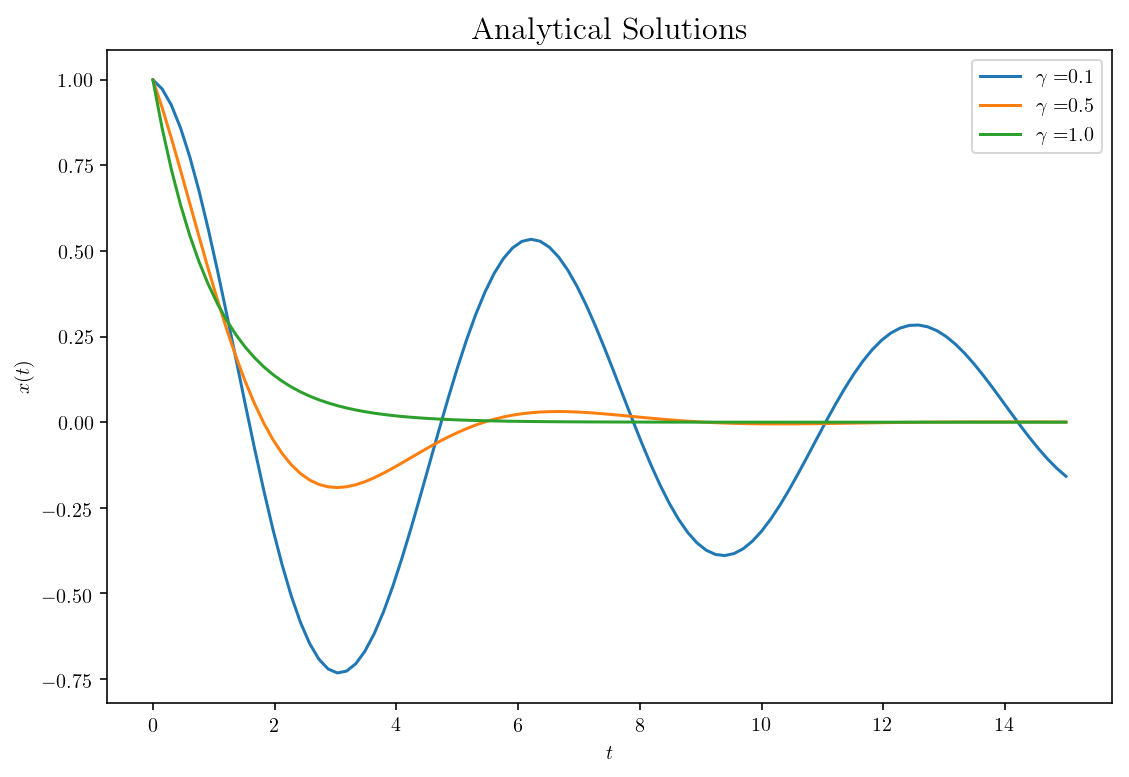

In [54]:
T = np.linspace(0,15,100)
gamma_list = [0.1, 0.5, 1.]
for gamma in gamma_list:
    plt.plot(T, sol(T,gamma),label=r"$\gamma = ${}".format(gamma))
plt.title("Analytical Solutions",fontsize=16)
plt.legend()
plt.ylabel(r"$x(t)$")
plt.xlabel(r"$t$")
plt.show()  

Increasing $\gamma$ decreases the number of oscillations completed before coming to rest at $x=0$. This parameter describes the strength of the damping.

** Part b.**

To write the function as two coupled first order equations, let 

$$ v = \frac{dx}{dt}.$$

Then we can write

$$\frac{d^2x}{dt^2} + 2 \gamma \dd{x}{t} +  x  = \frac{dv}{dt} + 2 \gamma v +x = 0.$$

In [7]:
from scipy.integrate import odeint

In [55]:
def deriv(y,t,g):
    #Return the derivative vector [dxdt,dvdt] for the differential equation above.
    x,v = y
    dxdt = v 
    dvdt = -2*g*v - x
    return [dxdt, dvdt]

In [60]:
#solve the ODE for the three gamma values and store each x(t) in s
init_cond = np.array([1,0])
s = [odeint(deriv,init_cond,T,args=(gamma_list[i],))[:,0] for i in range(3)]

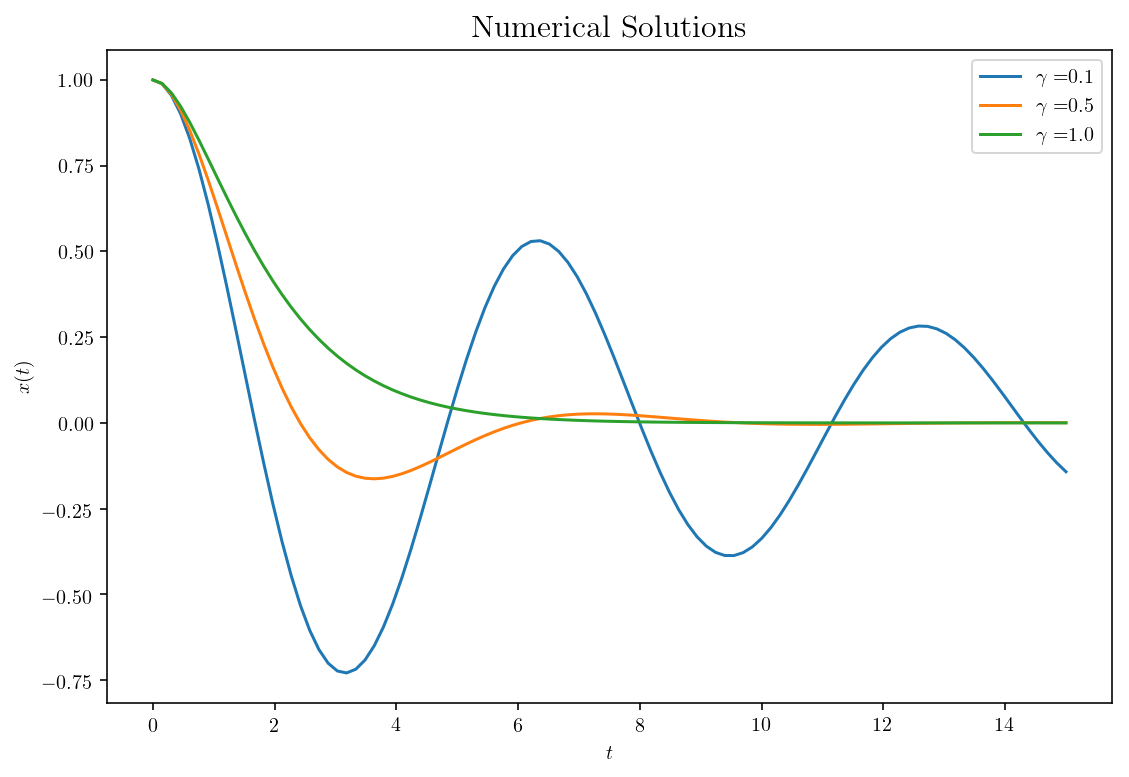

In [61]:
for i,gamma in enumerate(gamma_list):
    plt.plot(T, s[i],label=r"$\gamma = ${}".format(gamma))
plt.title("Numerical Solutions",fontsize=16)
plt.legend()
plt.ylabel(r"$x(t)$")
plt.xlabel(r"$t$")
plt.show()

Looks like the numerical solution agrees with the analytical solution very well.

### Some bad code

Here is a version of the solution of part b that generates the correct answers, but is very unclear.

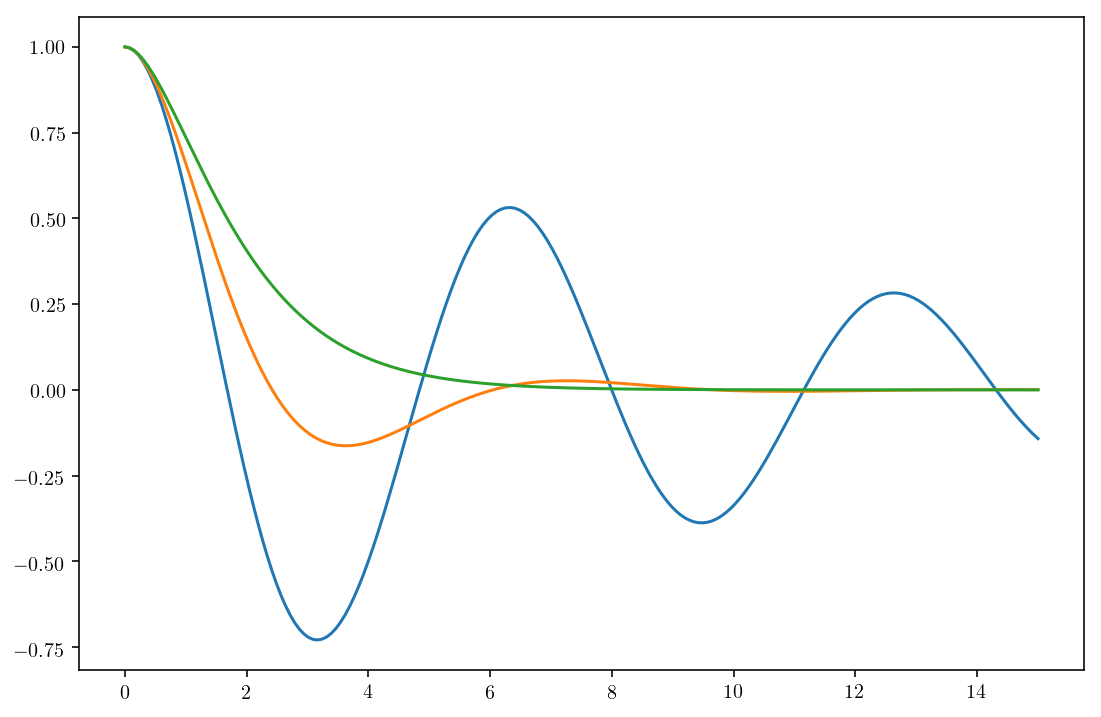

In [62]:
for i,g in enumerate(gamma_list):
    plt.plot(np.linspace(0,15,200),odeint(lambda y,t,g: [y[1],-2*g*y[1]-y[0]],[1,0],np.linspace(0,15,200),args=(g,))[:,0])
plt.show()

In this version, only someone very familar with python would have any idea what is going on. The code is not commented at all, there are no variables or functions names to guide my understanding, and there is one very complicated line that nests many different functions. Also note that the plot lacks a title, axis labels, and a legend. 